In [168]:
import pandas as pd
import math
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [169]:
dfData = pd.read_csv("/home/archit/Desktop/ad vs organic/cleaned_subset.csv", encoding = 'unicode_escape')
dfData.shape

(10682, 13)

In [170]:
dfPrev = pd.read_csv("/home/archit/Desktop/ad vs organic/prev_vid_stat.csv")
dfPrev.columns = ['Id','PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevPublishedAt', 'PrevViewCount', 'PrevTitle', 'PublishedYear',
       'ChannelAge']
dfPrev.to_csv("/home/archit/Desktop/ad vs organic/prev_vid_stat.csv", index=False)
dfPrev.shape

(1670, 9)

In [171]:
dfLang = pd.read_csv("/home/archit/Desktop/ad vs organic/data_and_language.csv", encoding = 'unicode_escape')
dfLang.head()

,Id,Lang
0,AUzyaHo0QQc,en
1,1Zgtdb7jp60,en
2,1Sfii7rnkJQ,en
3,UUwSKJjx9Go,en
4,Yl3NGvna2KA,en


In [172]:
dfChannel = pd.read_csv("/home/archit/Desktop/ad vs organic/channelStats.csv", encoding = 'unicode_escape')
dfChannel.head()

,Channel Id,publishedAt,subscriberCount,channelVideoCount,channelViewCount
0,UCUlTFib0pkPDGBYh7FQfo0A,2011-03-21T19:58:31.000Z,13,16,5803
1,UCvqHrRPqBw0D9B0wCNVwu8w,2012-01-07T22:35:00.000Z,3682,308,484444
2,UCatjfgWbdCUxNNAso8z9Usg,2006-10-06T22:31:17.000Z,96,50,143635
3,UCQa2_4V_9xtLefQGiPXqgNw,2006-10-12T09:10:36.000Z,29,4,11927
4,UCvzrgT1n8Im2bPogecOOu7A,2006-11-14T23:23:59.000Z,25,118,17209


In [173]:
dfData = dfData.merge(dfLang, on = 'Id', how = 'left')
dfData = dfData.merge(dfPrev, on = 'Id', how = 'left')
dfData = dfData.merge(dfChannel, on = 'Channel Id', how = 'left')
dfData.head()

,Id,Title,Description,LikeCount,DislikeCount,ViewCount,FavoriteCount,CommentCount,PublishedAt,Channel Id,...,PrevLikeCount,PrevPublishedAt,PrevViewCount,PrevTitle,PublishedYear,ChannelAge,publishedAt,subscriberCount,channelVideoCount,channelViewCount
0,AUzyaHo0QQc,b'300 pushups a day for 20 days!! - Results!!',b'**NEW** (2016) Abs Workout for 30 Days | htt...,40408,10312,13577683,0,8236,2010-07-22T10:28:30.000Z,UCPE_dNzOtjpP0vUA6papYaw,...,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-22T03:47:24.000Z,47571,23,16245729
1,1Zgtdb7jp60,b'John Cena - gym',"b""Follow John Cena on twitter: http://www.twit...",37867,1486,9986096,0,2563,2012-02-20T13:55:03.000Z,UCpAxDQTpPNgc6kFiBRNO_1A,...,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-11T20:58:03.000Z,109298,6,47779958
2,1Sfii7rnkJQ,b'Bodybuilding Motivation - No Time To Waste',"b""Follow me:\nhttp://instagram.com/shaqx.bb\nh...",17688,1291,8532402,0,1515,2012-01-18T15:06:01.000Z,UC3uDucFPe-E0I6CfxtHWZ6w,...,33472.0,2011-12-27T12:38:06.000Z,11719659.0,Bodybuilding Motivation - Pain is Temporary,2012.0,2011.0,2011-07-09T16:13:17.000Z,218558,19,75698414
3,UUwSKJjx9Go,b'Most Powerful Home Chest Workout Ever : Buil...,b'http://www.6weeksixpack.com This is one of t...,46293,2589,8301027,0,1490,2013-10-17T21:56:53.000Z,UCsiNPbLbwZk43FOCRrdKBlA,...,NaN,NaN,NaN,NaN,NaN,NaN,2006-08-07T08:12:53.000Z,1145468,585,186804665
4,Yl3NGvna2KA,b'Greg Plitt Best of The Best Workout Video Pr...,b'SIGN UP TODAY - http://bit.ly/jointheranks\r...,24784,1134,7141821,0,575,2011-03-30T18:57:57.000Z,UCU6WaCIOCL_eToBcsBYFwAQ,...,NaN,NaN,NaN,NaN,NaN,NaN,2009-10-24T03:18:10.000Z,158091,22,9908854


In [174]:
indices = list(dfPrev['Id'])
len(indices)

1670

In [175]:
for index in range(0,len(indices)):
    #with open('/home/archit/Desktop/ad vs organic/prev_vid_stat.csv') as f:
    dfData.loc[dfData['Id'] == indices[index],].to_csv('/home/archit/Desktop/ad vs organic/cleaned_data4.csv', header=False, mode = 'a', index = False)

In [176]:
dfData = pd.read_csv('/home/archit/Desktop/ad vs organic/cleaned_data4.csv')
dfData.columns = ['Id', 'Title', 'Description', 'LikeCount', 'DislikeCount', 'ViewCount',
       'FavoriteCount', 'CommentCount', 'PublishedAt', 'Channel Id',
       'Channel Title', 'Tags', 'Thumbnail Default', 'Lang',
       'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevPublishedAt', 'PrevViewCount', 'PrevTitle', 'PublishedYear',
       'ChannelAge', 'publishedAt', 'subscriberCount',
       'channelVideoCount', 'channelViewCount']
dfData.drop_duplicates(inplace = True)

In [177]:
dfData.columns

Index(['Id', 'Title', 'Description', 'LikeCount', 'DislikeCount', 'ViewCount',
       'FavoriteCount', 'CommentCount', 'PublishedAt', 'Channel Id',
       'Channel Title', 'Tags', 'Thumbnail Default', 'Lang',
       'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevPublishedAt', 'PrevViewCount', 'PrevTitle', 'PublishedYear',
       'ChannelAge', 'publishedAt', 'subscriberCount', 'channelVideoCount',
       'channelViewCount'],
      dtype='object')

In [178]:
dfData.head()

,Id,Title,Description,LikeCount,DislikeCount,ViewCount,FavoriteCount,CommentCount,PublishedAt,Channel Id,...,PrevLikeCount,PrevPublishedAt,PrevViewCount,PrevTitle,PublishedYear,ChannelAge,publishedAt,subscriberCount,channelVideoCount,channelViewCount
0,EBVTMSKY-Cw,b'BODYBUILDING MOTIVATION - How Bad Do You Wan...,b'Subscribe and Stay Tuned! Visit my channel a...,20440,1465,6799110,0,2397,2012-02-19T08:32:48.000Z,UCiWEGEhbwxz9cb0uTbnUepw,...,1964.0,2012-01-25T13:53:09.000Z,628378.0,BODYBUILDING MOTIVATION - The Power Of Faith,2012.0,2010.0,2010-11-10T16:53:31.000Z,54796,17,26195188
1,VnNH6OMqT9E,b'Jeff Seid Transformation 17 years old',"b""How ya doin' ;)\nwww.jeffseid.com\n\n\nLink ...",8807,2094,3669026,0,4598,2012-05-07T23:49:57.000Z,UC5I7lMWWfZQ_RPjyNnh2ntg,...,0.0,0,0.0,0,2012.0,2009.0,2009-06-16T22:46:28.000Z,7780,1,3670089
2,isb4txkVPrk,b'Bodybuilding Motivation - Collapse (MPW)',b'Like/fav/sub! Visit http://www.cutandjacked....,4686,353,3477038,0,901,2011-10-06T03:17:38.000Z,UClWYqSmEaMbHMfAgNHhn7nw,...,224.0,2011-09-26T00:33:38.000Z,58192.0,Bodybuilding Motivation - I Choose To Rise (MPW),2011.0,2011.0,2011-08-05T07:24:26.000Z,8963,23,5852831
3,o-IVVhPrZ0A,b'BODYBUILDING TILL IM DEAD',b'http://www.professionalmuscle.com - Chat Liv...,15630,496,3191046,0,1928,2012-08-26T11:31:18.000Z,UCyiCdHZb1iNaQojRzRDTjNg,...,8181.0,2012-04-30T10:02:07.000Z,1710615.0,I can't stop BODYBUILDING,2012.0,2010.0,2010-10-22T17:33:31.000Z,157791,47,50255277
4,L4S7sYup_Rw,b'Stomach Exercises For Sexy Abs',b'http://www.2losebellyfat.com/ - Visit for mo...,5912,223,2211906,0,456,2009-06-26T23:28:14.000Z,UC271MxMmsFrL6QfDzpk956g,...,0.0,0,0.0,0,2009.0,2009.0,2009-06-26T23:13:26.000Z,3878,1,2213079


In [179]:
dfData = dfData[dfData['channelVideoCount'] < 2000]
dfData = dfData[dfData['subscriberCount'] > 0]
dfData = dfData[dfData['Lang'] == 'en']

In [180]:
dfData.shape

(1656, 26)

In [181]:
type(dfData['Title'])

pandas.core.series.Series

In [182]:
# Conver to lower case 
dfData['Title'] = dfData['Title'].str.lower()


# How To
dfData['HowTo'] = (dfData['Title'].str.contains('how')  | 
                       dfData['Tags'].str.contains('how'))

# Motivational
dfData['Motivation'] = (dfData['Title'].str.contains('motivation')  | 
                       dfData['Tags'].str.contains('motivation')  
                      )


# Transformation
dfData['Transform'] = (dfData['Title'].str.contains('transform')  | 
                       dfData['Tags'].str.contains('transform')  
                      )

# Abs Workout
dfData['Abs Video'] = (dfData['Title'].str.contains('abs')  | 
                       dfData['Title'].str.contains('six') | 
                       dfData['Title'].str.contains(' 6') | 
                       dfData['Title'].str.contains('abdomen') |
                       dfData['Tags'].str.contains('abs')  | 
                       dfData['Tags'].str.contains('six') | 
                       dfData['Tags'].str.contains(' 6') | 
                       dfData['Tags'].str.contains('abdomen') 
                      )
        
# Chest Workout
dfData['Chest Video'] = (dfData['Title'].str.contains('chest')  |
                         dfData['Title'].str.contains('pushup') | 
                         dfData['Title'].str.contains('bench') | 
                         dfData['Title'].str.contains('bench') | 
                         dfData['Title'].str.contains('push up') |
                         dfData['Title'].str.contains('dumbell press') |
                         dfData['Tags'].str.contains('chest')  |
                         dfData['Tags'].str.contains('pushup') | 
                         dfData['Tags'].str.contains('bench') | 
                         dfData['Tags'].str.contains('bench') | 
                         dfData['Tags'].str.contains('push up') |
                         dfData['Tags'].str.contains('dumbell press'))

# Back Workouts 
dfData['Back Video'] = (dfData['Title'].str.contains('back') | 
                        dfData['Title'].str.contains('pull up') | 
                        dfData['Title'].str.contains('chin up')  | 
                        dfData['Title'].str.contains('deadlift') | 
                        dfData['Tags'].str.contains('back') | 
                        dfData['Tags'].str.contains('pull up') | 
                        dfData['Tags'].str.contains('chin up')  | 
                        dfData['Tags'].str.contains('deadlift'))

# Leg Workouts
dfData['Legs Video'] = (dfData['Title'].str.contains('leg') | 
                        dfData['Title'].str.contains('squat') | 
                        dfData['Title'].str.contains('butt') | 
                        dfData['Title'].str.contains('quad') | 
                        dfData['Title'].str.contains('calve') |
                       dfData['Tags'].str.contains('leg') | 
                        dfData['Tags'].str.contains('squat') | 
                        dfData['Tags'].str.contains('butt') | 
                        dfData['Tags'].str.contains('quad') | 
                        dfData['Tags'].str.contains('calve') )

# Arm Workout
dfData['Arm Video'] = (dfData['Title'].str.contains('shoulder') | 
                       dfData['Title'].str.contains('arm') | 
                       dfData['Title'].str.contains('bicep')  |
                       dfData['Title'].str.contains('tricep') | 
                       dfData['Title'].str.contains('delt') |
                       dfData['Tags'].str.contains('shoulder') | 
                       dfData['Tags'].str.contains('arm') | 
                       dfData['Tags'].str.contains('bicep')  |
                       dfData['Tags'].str.contains('tricep') | 
                       dfData['Tags'].str.contains('delt'))

In [183]:
dfData.head()

,Id,Title,Description,LikeCount,DislikeCount,ViewCount,FavoriteCount,CommentCount,PublishedAt,Channel Id,...,channelVideoCount,channelViewCount,HowTo,Motivation,Transform,Abs Video,Chest Video,Back Video,Legs Video,Arm Video
0,EBVTMSKY-Cw,b'bodybuilding motivation - how bad do you wan...,b'Subscribe and Stay Tuned! Visit my channel a...,20440,1465,6799110,0,2397,2012-02-19T08:32:48.000Z,UCiWEGEhbwxz9cb0uTbnUepw,...,17,26195188,True,True,False,False,True,True,True,True
1,VnNH6OMqT9E,b'jeff seid transformation 17 years old',"b""How ya doin' ;)\nwww.jeffseid.com\n\n\nLink ...",8807,2094,3669026,0,4598,2012-05-07T23:49:57.000Z,UC5I7lMWWfZQ_RPjyNnh2ntg,...,1,3670089,False,False,True,True,False,False,False,False
2,isb4txkVPrk,b'bodybuilding motivation - collapse (mpw)',b'Like/fav/sub! Visit http://www.cutandjacked....,4686,353,3477038,0,901,2011-10-06T03:17:38.000Z,UClWYqSmEaMbHMfAgNHhn7nw,...,23,5852831,False,True,False,False,False,False,False,False
3,o-IVVhPrZ0A,b'bodybuilding till im dead',b'http://www.professionalmuscle.com - Chat Liv...,15630,496,3191046,0,1928,2012-08-26T11:31:18.000Z,UCyiCdHZb1iNaQojRzRDTjNg,...,47,50255277,False,True,False,False,False,False,False,False
4,L4S7sYup_Rw,b'stomach exercises for sexy abs',b'http://www.2losebellyfat.com/ - Visit for mo...,5912,223,2211906,0,456,2009-06-26T23:28:14.000Z,UC271MxMmsFrL6QfDzpk956g,...,1,2213079,False,False,False,True,False,False,False,False


In [184]:
# order of preference in categorizing video in case there are multiple categories to fit
# abs < chest < back < legs < arm < motivaton < HowTo < Motivation < Transform
dfData.loc[dfData['Abs Video'] == True , 'Category'] = 'Abs'
dfData.loc[dfData['Chest Video'] == True , 'Category'] = 'Chest'
dfData.loc[dfData['Back Video'] == True, 'Category'] = 'Back'
dfData.loc[dfData['Legs Video'] == True, 'Category'] = 'Legs'
dfData.loc[dfData['Arm Video'] == True, 'Category'] = 'Arms'
#dfData.loc[dfData['Motivation'] == True, 'Category'] = 'Motivation'
dfData.loc[dfData['HowTo'] == True, 'Category'] = 'HowTo'
dfData.loc[dfData['Motivation'] == True, 'Category'] = 'Motivation'
dfData.loc[dfData['Transform'] == True, 'Category'] = 'Transform'
dfData.shape

(1656, 35)

In [185]:
otherVid = dfData[dfData['Category'].isnull()]
otherVid.shape[0]

886

In [186]:
dfData = dfData[dfData['Category'].notnull()]
dfData.shape

(770, 35)

In [187]:
absVid = dfData[dfData['Category'] == 'Abs']
chestVid = dfData[dfData['Category'] == 'Chest']
backVid = dfData[dfData['Category'] == 'Back']
legsVid = dfData[dfData['Category'] == 'Legs']
armsVid = dfData[dfData['Category'] == 'Arms']
howToVid = dfData[dfData['Category'] == 'HowTo']
motivationVid = dfData[dfData['Category'] == 'Motivation']
transformVid = dfData[dfData['Category'] == 'Transform']


print("Number of Abs Related Videos: " + str(absVid.shape[0]))
print("Number of Chest Related Videos: " + str(chestVid.shape[0]))
print("Number of Back Related Videos: " + str(backVid.shape[0]))
print("Number of Leg Related Videos: " + str(legsVid.shape[0]))
print("Number of Arm Related Videos: " + str(armsVid.shape[0]))

Number of Abs Related Videos: 50
Number of Chest Related Videos: 60
Number of Back Related Videos: 80
Number of Leg Related Videos: 123
Number of Arm Related Videos: 140


### Different categories of fitnesss videos in database

Text(0.5,1,'Number of Videos for each Muscle Group')

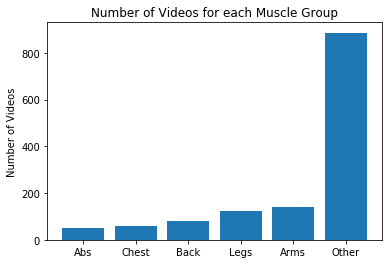

In [188]:
yCols = ['Abs', 'Chest', 'Back', 'Legs', 'Arms', 'Other']
xCols = [absVid.shape[0], chestVid.shape[0], backVid.shape[0], legsVid.shape[0], armsVid.shape[0], otherVid.shape[0]]
y = np.arange(len(yCols))
plt.bar(y, xCols,align = 'center')
plt.xticks(y,yCols)
plt.ylabel("Number of Videos")
plt.title("Number of Videos for each Muscle Group")

### Understanding view distribution

Category
Motivation    260460.650000
Transform     112217.136364
Chest          98683.400000
Abs            55900.980000
HowTo          34247.973856
Back           21723.912500
Arms           17165.078571
Legs            8080.227642
Name: ViewCount, dtype: float64


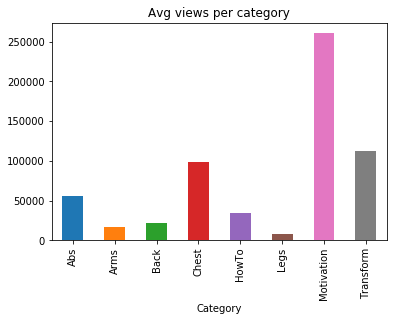

In [189]:
dfData.groupby('Category').ViewCount.mean().plot(kind = 'bar', title = 'Avg views per category')
print(dfData.groupby('Category').ViewCount.mean().sort_values(ascending = False))

In [190]:
dfData.columns

Index(['Id', 'Title', 'Description', 'LikeCount', 'DislikeCount', 'ViewCount',
       'FavoriteCount', 'CommentCount', 'PublishedAt', 'Channel Id',
       'Channel Title', 'Tags', 'Thumbnail Default', 'Lang',
       'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevPublishedAt', 'PrevViewCount', 'PrevTitle', 'PublishedYear',
       'ChannelAge', 'publishedAt', 'subscriberCount', 'channelVideoCount',
       'channelViewCount', 'HowTo', 'Motivation', 'Transform', 'Abs Video',
       'Chest Video', 'Back Video', 'Legs Video', 'Arm Video', 'Category'],
      dtype='object')

Category
Motivation    260460.650000
Transform     112217.136364
Chest          98683.400000
Abs            55900.980000
HowTo          34247.973856
Back           21723.912500
Arms           17165.078571
Legs            8080.227642
Name: ViewCount, dtype: float64


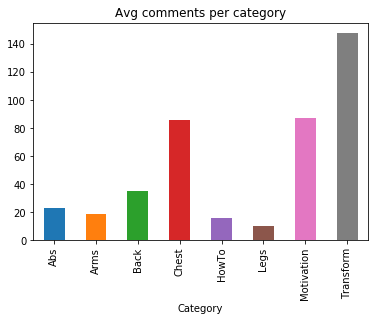

In [191]:
dfData.groupby('Category').CommentCount.mean().plot(kind = 'bar', title = 'Avg comments per category')
print(dfData.groupby('Category').ViewCount.mean().sort_values(ascending = False))

Category
Motivation    828.575000
Transform     364.863636
Chest         224.150000
Abs           189.080000
HowTo         149.921569
Back          119.637500
Arms           91.157143
Legs           42.536585
Name: LikeCount, dtype: float64


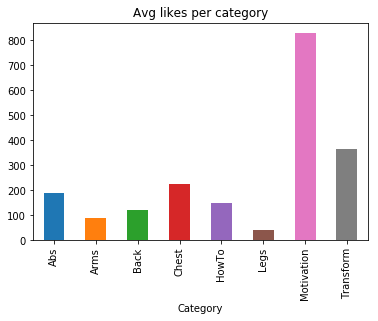

In [192]:
dfData.groupby('Category').LikeCount.mean().plot(kind = 'bar', title = 'Avg likes per category')
print(dfData.groupby('Category').LikeCount.mean().sort_values(ascending = False))

Category
Chest         152.100000
Transform      59.818182
Motivation     55.358333
Back           13.862500
Abs             9.420000
HowTo           9.287582
Arms            5.371429
Legs            3.333333
Name: DislikeCount, dtype: float64


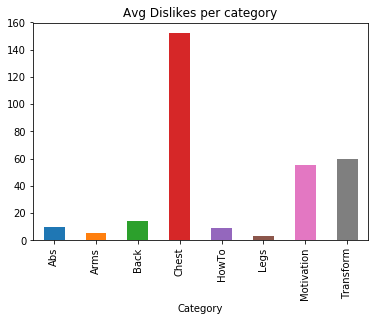

In [193]:
dfData.groupby('Category').DislikeCount.mean().plot(kind = 'bar', title = 'Avg Dislikes per category')
print(dfData.groupby('Category').DislikeCount.mean().sort_values(ascending = False))

### Obseravtions
Give proper insight here later using venn diagram

### Sponsorship/ discounted videos view distribution

isSponsored
False    72310.131062
True     15869.571429
Name: ViewCount, dtype: float64


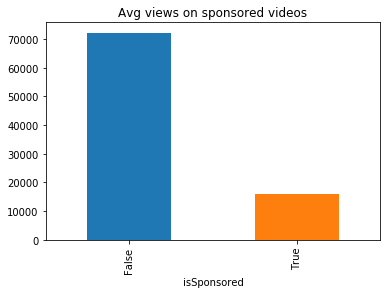

In [194]:
dfData['isSponsored'] = dfData['Description'].str.contains("sponsored") | dfData['Description'].str.contains("provided by")
dfData.groupby('isSponsored').ViewCount.mean().plot(kind = 'bar', title = 'Avg views on sponsored videos')
print(dfData.groupby('isSponsored').ViewCount.mean())

hasDiscount
False    72421.400788
True     19003.444444
Name: ViewCount, dtype: float64


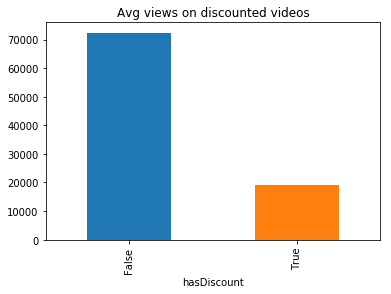

In [195]:
dfData['hasDiscount'] = dfData['Description'].str.contains('discount') | dfData['Description'].str.contains('code')
dfData.groupby('hasDiscount').ViewCount.mean().plot(kind = 'bar', title = 'Avg views on discounted videos')
print(dfData.groupby('hasDiscount').ViewCount.mean())

In [196]:
dfData['LikeDislikeRatio'] = dfData['LikeCount']/(dfData['LikeCount'] + dfData['DislikeCount'])

In [197]:
dfData.shape

(770, 38)

In [198]:
dfData.columns

Index(['Id', 'Title', 'Description', 'LikeCount', 'DislikeCount', 'ViewCount',
       'FavoriteCount', 'CommentCount', 'PublishedAt', 'Channel Id',
       'Channel Title', 'Tags', 'Thumbnail Default', 'Lang',
       'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevPublishedAt', 'PrevViewCount', 'PrevTitle', 'PublishedYear',
       'ChannelAge', 'publishedAt', 'subscriberCount', 'channelVideoCount',
       'channelViewCount', 'HowTo', 'Motivation', 'Transform', 'Abs Video',
       'Chest Video', 'Back Video', 'Legs Video', 'Arm Video', 'Category',
       'isSponsored', 'hasDiscount', 'LikeDislikeRatio'],
      dtype='object')

In [199]:
def feature_engineer(dfData):
    dfData =dfData.drop(['Category','FavoriteCount', 'PrevTitle', 'PrevPublishedAt'],axis =1)
    dfData['is_english'] = dfData['Lang'].apply(lambda x: 1 if x=='en' else 0)
    dfData = dfData.drop('Lang', axis=1)
    
    dfData['is_Abs'] = dfData['Abs Video'].apply(lambda x: 1 if x==True else 0)
    dfData['is_Chest'] = dfData['Chest Video'].apply(lambda x: 1 if x==True else 0)
    dfData['is_Back'] = dfData['Back Video'].apply(lambda x: 1 if x==True else 0)
    dfData['is_Legs'] = dfData['Legs Video'].apply(lambda x: 1 if x==True else 0)
    dfData['is_Arms'] = dfData['Arm Video'].apply(lambda x: 1 if x==True else 0)
    dfData['isSponsored'] = dfData['isSponsored'].apply(lambda x: 1 if x==True else 0)
    dfData['hasDiscount'] = dfData['hasDiscount'].apply(lambda x: 1 if x==True else 0)
    dfData['PublishedYear'] = dfData['PublishedAt'].apply(lambda x: x[:4])
    dfData['ChannelAge'] =  dfData['publishedAt'].apply(lambda x: x[:4])
    dfData['channelViewCount'] = np.log(dfData['channelViewCount'])
    dfData['LikeDislikeRatio'] = dfData['LikeCount']/(dfData['DislikeCount'] + dfData['LikeCount'])
    dfData['PrevCommentCount'] = dfData['PrevCommentCount'].fillna(0)
    dfData['PrevDislikeCount'] = dfData['PrevDislikeCount'].fillna(0)
    dfData['PrevLikeCount'] = dfData['PrevLikeCount'].fillna(0)
    dfData['PrevViewCount'] = dfData['PrevViewCount'].fillna(0)    
    
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].replace(np.inf, np.nan)
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].fillna(0)
    dfData = dfData.drop(['Title','Description','PublishedAt','publishedAt','Channel Id','Channel Title','Tags','Thumbnail Default','Abs Video','Chest Video','Back Video','Legs Video','Arm Video'],axis = 1)
    
    return dfData

def drop_obvious_features(dfData):
    dfData = dfData.drop(['LikeCount','DislikeCount','CommentCount'],axis = 1)
    return dfData


In [200]:
df = feature_engineer(dfData)
df.columns

Index(['Id', 'LikeCount', 'DislikeCount', 'ViewCount', 'CommentCount',
       'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevViewCount', 'PublishedYear', 'ChannelAge', 'subscriberCount',
       'channelVideoCount', 'channelViewCount', 'HowTo', 'Motivation',
       'Transform', 'isSponsored', 'hasDiscount', 'LikeDislikeRatio',
       'is_english', 'is_Abs', 'is_Chest', 'is_Back', 'is_Legs', 'is_Arms'],
      dtype='object')

In [201]:
df.columns

Index(['Id', 'LikeCount', 'DislikeCount', 'ViewCount', 'CommentCount',
       'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount',
       'PrevViewCount', 'PublishedYear', 'ChannelAge', 'subscriberCount',
       'channelVideoCount', 'channelViewCount', 'HowTo', 'Motivation',
       'Transform', 'isSponsored', 'hasDiscount', 'LikeDislikeRatio',
       'is_english', 'is_Abs', 'is_Chest', 'is_Back', 'is_Legs', 'is_Arms'],
      dtype='object')

In [202]:
X, y = df.drop('ViewCount',axis = 1) , np.log(df['ViewCount'])
X.head()

,Id,LikeCount,DislikeCount,CommentCount,PrevCommentCount,PrevDislikeCount,PrevLikeCount,PrevViewCount,PublishedYear,ChannelAge,...,Transform,isSponsored,hasDiscount,LikeDislikeRatio,is_english,is_Abs,is_Chest,is_Back,is_Legs,is_Arms
0,EBVTMSKY-Cw,20440,1465,2397,159.0,106.0,1964.0,628378.0,2012,2010,...,False,0,0,0.933120,1,0,1,1,1,1
1,VnNH6OMqT9E,8807,2094,4598,0.0,0.0,0.0,0.0,2012,2009,...,True,0,0,0.807908,1,1,0,0,0,0
2,isb4txkVPrk,4686,353,901,43.0,3.0,224.0,58192.0,2011,2011,...,False,0,0,0.929946,1,0,0,0,0,0
3,o-IVVhPrZ0A,15630,496,1928,1037.0,195.0,8181.0,1710615.0,2012,2010,...,False,0,0,0.969242,1,0,0,0,0,0
4,L4S7sYup_Rw,5912,223,456,0.0,0.0,0.0,0.0,2009,2009,...,False,0,0,0.963651,1,1,0,0,0,0


In [203]:
X.columns

Index(['Id', 'LikeCount', 'DislikeCount', 'CommentCount', 'PrevCommentCount',
       'PrevDislikeCount', 'PrevLikeCount', 'PrevViewCount', 'PublishedYear',
       'ChannelAge', 'subscriberCount', 'channelVideoCount',
       'channelViewCount', 'HowTo', 'Motivation', 'Transform', 'isSponsored',
       'hasDiscount', 'LikeDislikeRatio', 'is_english', 'is_Abs', 'is_Chest',
       'is_Back', 'is_Legs', 'is_Arms'],
      dtype='object')

### Modeling training data with GradientBoostedClassifier
linear regression does not work great

In [204]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier, XGBRegressor

In [208]:
#train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

X_id, X = X.Id, X.drop('Id', axis = 1)

reg = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=0.5, verbose=0, warm_start=False)
reg.fit(X, y)
reg.score(X, y)
#pred = reg.predict(X)

#import pickle
#pickle.dump(reg, open("Gbr002.pickle.dat", "wb"))


0.9406991654797717

In [209]:
pred = reg.predict(X)

In [210]:
# function exponentiates values in test_y and pred and
# than calulated rmse of actual views
size = y.shape[0]
test_yL = y.tolist()
predL = pred.tolist()
X_id = X_id.tolist()
exActView = []
exPredView = []
diff = []
mape = {}
sqErr = []
for i in range(0, size):
    exActView.append(math.exp(test_yL[i]))
    exPredView.append(math.exp(predL[i]))
    diff.append(exActView[i] - exPredView[i])
    sqErr.append(math.pow(diff[i], 2))
for i in range(0, len(diff)):
    try:
        mape[X_id[i]] = abs(diff[i]/exActView[i])
    except KeyError:
        pass
#Mape = sum(mape)/len(diff)
rmse = math.sqrt(sum(sqErr) /size)/(max(exActView) - min(exActView))
dfEval = pd.DataFrame({'Id':X_id, 'Actual' : exActView, 'Pred': exPredView, 'Diff': diff})
dfEval.head()

,Actual,Diff,Id,Pred
0,6799110.0,1.923742e+06,EBVTMSKY-Cw,4.875368e+06
1,3669026.0,3.904099e+05,VnNH6OMqT9E,3.278616e+06
2,3477038.0,9.692511e+05,isb4txkVPrk,2.507787e+06
3,3191046.0,-1.112718e+05,o-IVVhPrZ0A,3.302318e+06
4,2211906.0,3.104747e+05,L4S7sYup_Rw,1.901431e+06


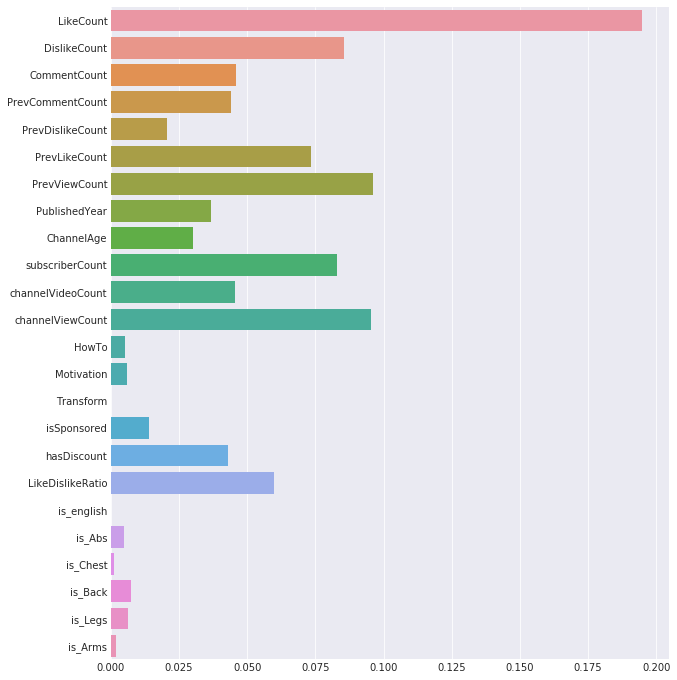

In [212]:
#X = X.drop('Id', axis = 1)
sns.set_style('darkgrid')
plt.figure(figsize=(10,12))
sns.barplot(x=reg.feature_importances_, y=X.columns)

In [213]:
# using train test split
X, y = df.drop(['ViewCount'], axis = 1), np.log(df['ViewCount'])
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

train_X_id, train_X = train_X.Id, train_X.drop('Id', axis = 1)
test_X_id, test_X = test_X.Id, test_X.drop('Id', axis = 1)

reg = GradientBoostingRegressor()
reg.fit(train_X, train_y)
reg.score(test_X, test_y)

0.7986361572854548

In [214]:
pred = reg.predict(test_X)

In [215]:
size = test_y.shape[0]
test_yL = test_y.tolist()
predL = pred.tolist()
exActView = []
exPredView = []
diff = []
sqErr = []
mape={}
for i in range(0, size):
    exActView.append(math.exp(test_yL[i]))
    exPredView.append(math.exp(predL[i]))
    diff.append(exActView[i] - exPredView[i])
    sqErr.append(math.pow(diff[i], 2))
rmse = math.sqrt(sum(sqErr) /size)/ (test_y.max() - test_y.min())
dfEval = pd.DataFrame({'Id':test_X_id, 'Actual' : exActView, 'Pred': exPredView, 'Diff': diff})
dfEval.head()
dfEval.to_csv('/home/archit/Desktop/ad vs organic/predictions_data.csv')

In [216]:
print("Rmse of the regressormodel is:" + str(rmse))

Rmse of the regressormodel is:17527.720394091688


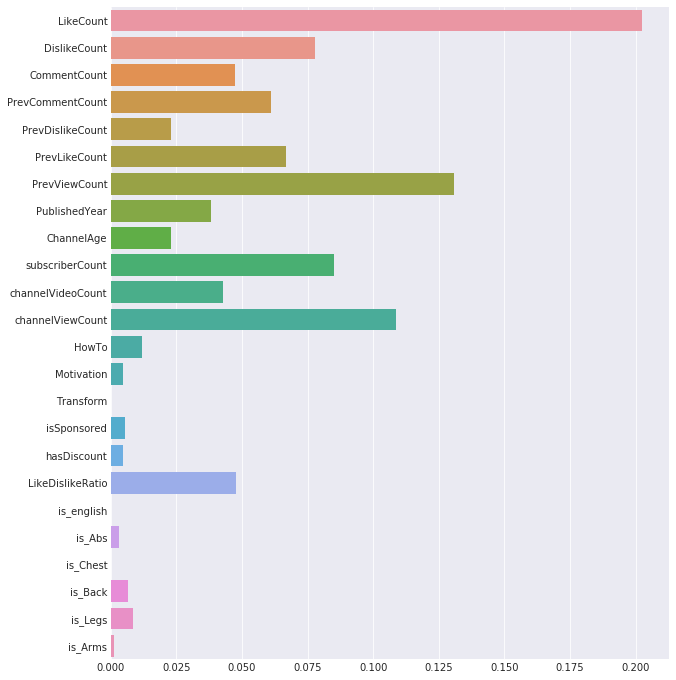

In [218]:
X = X.drop('Id', axis = 1)
sns.set_style('darkgrid')
plt.figure(figsize=(10,12))
sns.barplot(x=reg.feature_importances_, y=X.columns)

In [219]:
df = drop_obvious_features(feature_engineer(dfData))
X, y = df.drop(['ViewCount', 'LikeDislikeRatio'], axis = 1), np.log(df['ViewCount'])
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

train_X_id, train_X = train_X.Id, train_X.drop('Id', axis = 1)
test_X_id, test_X = test_X.Id, test_X.drop('Id', axis = 1)

reg = GradientBoostingRegressor()
reg.fit(train_X, train_y)
reg.score(test_X, test_y)


0.3920827275692862

In [220]:
pred = reg.predict(test_X)

In [221]:
# function exponentiates values in test_y and pred and
# than calulated rmse of actual views
size = test_y.shape[0]
test_yL = test_y.tolist()
predL = pred.tolist()
exActView = []
exPredView = []
diff = []
sqErr = []
for i in range(0, size):
    exActView.append(math.exp(test_yL[i]))
    exPredView.append(math.exp(predL[i]))
    diff.append(exActView[i] - exPredView[i])
    sqErr.append(math.pow(diff[i], 2))
rmse = math.sqrt(sum(sqErr) /size)/ (test_y.max() - test_y.min())
dfEval = pd.DataFrame({'Actual' : exActView, 'Pred': exPredView, 'Diff': diff})
dfEval.head()

,Actual,Diff,Pred
0,1318.0,-2334.125662,3652.125662
1,1726.0,-9496.774108,11222.774108
2,9277.0,-287.219986,9564.219986
3,66202.0,-81105.936912,147307.936912
4,22523.0,12253.996110,10269.003890


In [222]:
print("Rmse of the regressormodel is:" + str(rmse))

Rmse of the regressormodel is:23244.5928813892


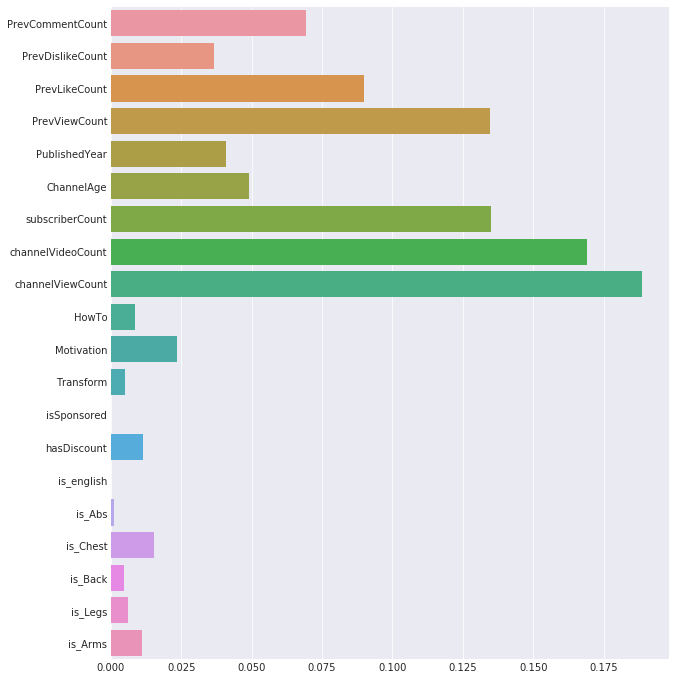

In [223]:
X = X.drop('Id', axis = 1)
sns.set_style('darkgrid')
plt.figure(figsize=(10,12))
sns.barplot(x=reg.feature_importances_, y=X.columns)